# CRYPTO MARKET PRICE DATA EXPLORATORY DATA ANALYSIS 
### COLLABORATORS ###

**01. AMOGH DATH KALASAPURA ARUNKUMAR**
<br></br>
**02. RAJVEER SINGH SAINI**
<br></br>
**03. HARSHPREET SINGH**
<br></br>
**04. JASPREET KAUR**
<br></br>

**GITHUB REPO LINK** :- [https://github.com/Amogh-007-Rin/AI-ML-Model-For-CryptoAnalysis]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**LOADING THE DATASET**

In [2]:
df = pd.read_csv("../dataset/crypto_sentiment_prediction_dataset.csv")

In [3]:
df.head(10)

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8
5,2025-06-04 22:39:07,Polkadot,7.2521,-4.11,2631031.62,6.252717e+10,0.057,0.147,3.39,387,56.2,98.8,35.3,81.7
6,2025-06-04 23:07:46,Polkadot,7.6604,-2.89,958183.80,1.357649e+11,-0.046,-0.244,6.14,1326,57.7,39.0,56.1,75.7
7,2025-06-04 23:15:29,Solana,77.7702,-11.79,5560303.82,1.582158e+12,0.079,0.064,0.87,328,55.5,99.0,53.2,71.3
8,2025-06-04 23:26:40,Bitcoin,47418.4096,1.05,1800434.38,3.437553e+14,-0.728,-0.274,2.73,707,35.3,36.0,58.3,88.7
9,2025-06-04 23:55:18,Avalanche,35.9923,-3.41,910727.30,8.942665e+10,0.724,0.455,4.02,679,66.3,52.1,53.0,93.4


**What does df.head(10) returns ?**
<br></br>
<b>Answer</b>
<br></br>
<i>It Displays the first 10 rows of the dataset to get an initial look at the structure and sample data values.</i>
<i>The above table shows the information about the first 10 rows of the dataset. It shows the timestamp of each crptocurrencies like [Cosmos, Algorand, Ethereum, Solana, Bitcoin, etc] along with current price in USD, 24hr trading volume, market cap in USD, social sentiment score, likewise in total 14 different features.</i>


In [4]:
df.tail(10)

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
2053,2025-07-04 16:29:41,Polkadot,7.5403,-4.14,6118061.98,9.929092e+10,-0.402,-0.314,6.24,632,35.4,49.7,40.3,78.1
2054,2025-07-04 16:40:39,Ethereum,3403.0849,-8.88,6139201.71,2.999260e+13,0.113,0.174,1.46,14,48.5,100.0,55.7,69.4
2055,2025-07-04 16:47:32,Bitcoin,40200.3350,-0.98,32381948.11,1.282930e+14,-0.173,-0.337,5.55,1848,66.9,55.9,51.9,79.6
2056,2025-07-04 17:04:24,Bitcoin,43669.4940,0.58,2984258.03,2.803336e+14,-0.183,-0.173,4.40,724,38.7,73.0,76.2,68.6
2057,2025-07-04 17:06:27,Chainlink,15.7797,-2.74,1280029.92,1.800106e+11,0.303,0.336,2.60,109,69.3,33.7,33.1,79.1
2058,2025-07-04 17:16:03,Cardano,0.4492,-4.66,6345791.01,8.185563e+09,0.327,0.009,2.54,1695,56.5,77.3,51.9,72.4
2059,2025-07-04 17:25:39,Ethereum,3077.3009,0.33,590629.81,2.546980e+13,-0.277,-0.143,2.31,1093,40.1,30.4,40.5,79.2
2060,2025-07-04 17:43:50,Polkadot,8.1297,11.93,24276229.78,1.224982e+11,0.216,0.001,3.07,401,51.7,93.3,41.6,71.0
2061,2025-07-04 19:31:59,Polygon,1.1212,-7.76,2126227.67,2.240884e+10,0.144,0.160,2.32,202,66.3,76.2,37.6,74.8
2062,2025-07-04 19:58:28,Ethereum,3312.5590,3.12,9458225.78,2.011575e+13,0.005,0.622,5.02,276,53.5,71.3,42.7,72.8


**What does df.tail(10) returns ?**
<br></br>
<b>Answer</b>
<br></br>
<i>It Displays the last 10 rows of the dataset to get an initial look at the structure and sample data values.</i>
<i>The above table shows the information about the last 10 rows of the dataset. It shows the timestamp of each crptocurrencies like [Cosmos, Algorand, Ethereum, Solana, Bitcoin, etc] along with current price in USD, 24hr trading volume, market cap in USD, social sentiment score, likewise in total 14 different features.</i>


In [5]:
df.sample(20)

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
1535,2025-06-27 00:30:02,Cardano,0.4458,10.80,17664776.31,7.318800e+09,0.092,-0.338,2.28,3994,45.0,100.0,56.2,77.7
319,2025-06-09 15:34:51,Avalanche,33.9625,-14.31,5200668.78,1.160123e+11,0.199,0.248,3.48,58,58.6,97.3,86.2,72.3
1945,2025-07-03 02:48:49,Cosmos,12.1772,-4.93,1548196.55,9.921607e+10,0.047,0.072,3.49,219,52.9,94.8,58.8,68.7
797,2025-06-16 19:00:09,Algorand,0.3397,2.61,2738577.83,5.858910e+09,0.242,0.072,0.60,45,69.4,54.2,53.8,81.6
289,2025-06-09 06:03:28,Avalanche,33.6245,-9.05,931386.83,3.657574e+11,-0.551,-0.204,3.00,10235,33.4,100.0,62.6,79.4
340,2025-06-09 20:50:39,Cardano,0.4272,12.07,2727477.30,4.345185e+09,0.248,0.046,3.19,561,55.0,91.9,38.5,75.0
750,2025-06-16 05:46:57,Ethereum,3314.5673,-9.97,4333893.88,1.006445e+13,-0.100,0.263,1.58,7517,52.2,100.0,23.5,77.3
678,2025-06-15 05:10:28,Avalanche,37.9972,0.98,3596318.89,1.343609e+11,-0.555,-0.138,2.86,35,23.3,79.1,69.0,76.2
134,2025-06-07 03:50:11,Avalanche,37.6794,-6.00,9173798.98,2.368622e+11,0.374,0.206,4.35,130,57.5,75.1,75.1,79.8
413,2025-06-10 22:09:25,Cardano,0.4324,-6.20,5179561.78,6.476101e+09,0.405,0.004,0.76,811,58.6,91.5,83.1,77.1


**What does df.sample(20) returns ?**
<br></br>
<b>Answer</b>
<br></br>
<i>It Displays the random 20 rows of the dataset to get an initial look at the structure and sample data values.</i>
<i>The above table shows the information about the random 10 rows of the dataset. It shows the timestamp of each crptocurrencies like [Cosmos, Algorand, Ethereum, Solana, Bitcoin, etc] along with current price in USD, 24hr trading volume, market cap in USD, social sentiment score, likewise in total 14 different features.</i>


In [6]:
df.shape

(2063, 14)

**What does df.shape return?**
<br>

<b>Answer</b>
<br>

<i>It returns a tuple showing the number of rows and columns in the dataset in the format (rows, columns).
This helps understand the dataset size — for example, how many cryptocurrency observations and total features are present.</i>

In [7]:
features = df.columns
columns = len(features)
print("total number of features present in the dataset :-", columns)
print("================Features decription=========================\n")
print(features)

total number of features present in the dataset :- 14
================Features decription=========================

Index(['timestamp', 'cryptocurrency', 'current_price_usd',
       'price_change_24h_percent', 'trading_volume_24h', 'market_cap_usd',
       'social_sentiment_score', 'news_sentiment_score', 'news_impact_score',
       'social_mentions_count', 'fear_greed_index', 'volatility_index',
       'rsi_technical_indicator', 'prediction_confidence'],
      dtype='object')


In [8]:
df.index

RangeIndex(start=0, stop=2063, step=1)

**What does df.index return?**
<br>

<b>Answer</b>
<br>

<i>It shows the index range of the dataset, typically starting from 0 up to the number of rows minus one.
This helps verify that the dataset has a clean, continuous index without missing or duplicated index values.</i>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 2063 non-null   object 
 1   cryptocurrency            2063 non-null   object 
 2   current_price_usd         2063 non-null   float64
 3   price_change_24h_percent  2063 non-null   float64
 4   trading_volume_24h        2063 non-null   float64
 5   market_cap_usd            2063 non-null   float64
 6   social_sentiment_score    2063 non-null   float64
 7   news_sentiment_score      2063 non-null   float64
 8   news_impact_score         2063 non-null   float64
 9   social_mentions_count     2063 non-null   int64  
 10  fear_greed_index          2063 non-null   float64
 11  volatility_index          2063 non-null   float64
 12  rsi_technical_indicator   2063 non-null   float64
 13  prediction_confidence     2063 non-null   float64
dtypes: float

**What does df.info() return?**
<br>

<b>Answer</b>
<br>

<i>It provides a concise summary of the dataset including total rows, column names, data types, non-null counts, and memory usage.
This helps identify missing values, understand feature types (float, int, object), and check dataset quality.</i>

In [10]:
df.dtypes

timestamp                    object
cryptocurrency               object
current_price_usd           float64
price_change_24h_percent    float64
trading_volume_24h          float64
market_cap_usd              float64
social_sentiment_score      float64
news_sentiment_score        float64
news_impact_score           float64
social_mentions_count         int64
fear_greed_index            float64
volatility_index            float64
rsi_technical_indicator     float64
prediction_confidence       float64
dtype: object

**What does df.dtypes return?**
<br>

<b>Answer</b>
<br>

<i>It returns the data type of each column in the dataset, such as float64, int64, or object.
This helps determine which columns are numerical, categorical, or datetime, and indicates if type conversion is needed.</i>

In [11]:
df.describe(include="all")

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
count,2063,2063,2063.000000,2063.000000,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
unique,2063,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-07-04 19:58:28,Ethereum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4260.360520,-0.018042,5.889564e+06,4.568510e+13,0.011158,0.002375,3.688366,1218.317014,50.494910,76.436937,50.501503,77.123413
std,NaN,NaN,12603.767442,8.000837,7.451165e+06,1.581473e+14,0.303325,0.308788,1.712072,2501.245623,13.367164,21.245765,15.116517,6.651359
min,NaN,NaN,0.298700,-25.560000,2.060664e+05,5.022090e+07,-1.000000,-1.000000,0.070000,2.000000,0.000000,21.400000,1.400000,55.900000
25%,NaN,NaN,1.208650,-5.755000,1.835157e+06,1.113379e+10,-0.197500,-0.202000,2.390000,143.500000,41.400000,60.700000,40.250000,72.650000
50%,NaN,NaN,13.344200,0.020000,3.633502e+06,1.255924e+11,0.012000,0.007000,3.670000,409.000000,50.600000,79.000000,50.500000,76.700000
75%,NaN,NaN,84.970000,5.755000,7.111602e+06,7.634962e+11,0.215000,0.211500,4.970000,1178.000000,59.400000,100.000000,60.550000,81.100000


**What does df.describe(include='all') return?**
<br>

<b>Answer</b>
<br>

<i>It generates descriptive statistics for all columns — both numeric and categorical.
This includes mean, standard deviation, min, max, percentiles for numerical columns and frequency counts for categorical ones, giving a detailed understanding of the dataset’s distribution and central tendencies.</i>

In [12]:
df.nunique()

timestamp                   2063
cryptocurrency                10
current_price_usd           2005
price_change_24h_percent    1486
trading_volume_24h          2063
market_cap_usd              2063
social_sentiment_score       972
news_sentiment_score         977
news_impact_score            657
social_mentions_count       1213
fear_greed_index             554
volatility_index             627
rsi_technical_indicator      623
prediction_confidence        323
dtype: int64

**What does df.nunique() return?**
<br>

<b>Answer</b>
<br>

<i>It returns the number of unique values in each column.
This helps identify categorical variables, measure variability, and detect columns with very high or very low uniqueness.</i>

In [13]:
df.memory_usage(deep=True)

Index                          132
timestamp                   140284
cryptocurrency              116619
current_price_usd            16504
price_change_24h_percent     16504
trading_volume_24h           16504
market_cap_usd               16504
social_sentiment_score       16504
news_sentiment_score         16504
news_impact_score            16504
social_mentions_count        16504
fear_greed_index             16504
volatility_index             16504
rsi_technical_indicator      16504
prediction_confidence        16504
dtype: int64

**What does df.memory_usage(deep=True) return?**
<br>

<b>Answer</b>
<br>

<i>It shows the memory usage of each column in bytes, giving a detailed breakdown of how much memory the dataset consumes.
This is useful for optimizing performance, especially when working with large datasets.</i>

---------------------------------------------------------------------------------END OF DATASET OVERVIEW----------------------------------------------------------------------------------------------

## Data Loading and Initial Exploration

In [14]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [15]:
#importing dataset
df= pd.read_csv("../dataset/crypto_sentiment_prediction_dataset.csv")
df.sample(5)

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
685,2025-06-15 06:48:08,Bitcoin,40238.6710,-3.20,6131799.77,4.119206e+14,-0.142,-0.101,4.23,69,23.6,86.9,72.9,75.9
996,2025-06-19 12:35:55,Cardano,0.4334,-13.36,11561958.19,2.099152e+09,0.285,0.232,1.41,281,61.6,100.0,52.6,79.2
853,2025-06-17 16:28:33,Algorand,0.3637,9.87,1995735.45,3.486308e+09,0.423,0.222,5.06,137,66.3,89.0,51.1,78.8
155,2025-06-07 10:35:59,Polygon,1.2177,-8.53,4789627.18,2.054870e+09,-0.214,-0.461,4.32,217,52.0,81.3,91.5,78.9
1567,2025-06-27 09:56:40,Algorand,0.3421,-13.72,4583903.06,3.734082e+09,-0.232,-0.154,3.76,545,44.0,100.0,61.8,78.6


In [16]:
#describing the data
df.describe(include='all')

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
count,2063,2063,2063.000000,2063.000000,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
unique,2063,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-07-04 19:58:28,Ethereum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4260.360520,-0.018042,5.889564e+06,4.568510e+13,0.011158,0.002375,3.688366,1218.317014,50.494910,76.436937,50.501503,77.123413
std,NaN,NaN,12603.767442,8.000837,7.451165e+06,1.581473e+14,0.303325,0.308788,1.712072,2501.245623,13.367164,21.245765,15.116517,6.651359
min,NaN,NaN,0.298700,-25.560000,2.060664e+05,5.022090e+07,-1.000000,-1.000000,0.070000,2.000000,0.000000,21.400000,1.400000,55.900000
25%,NaN,NaN,1.208650,-5.755000,1.835157e+06,1.113379e+10,-0.197500,-0.202000,2.390000,143.500000,41.400000,60.700000,40.250000,72.650000
50%,NaN,NaN,13.344200,0.020000,3.633502e+06,1.255924e+11,0.012000,0.007000,3.670000,409.000000,50.600000,79.000000,50.500000,76.700000
75%,NaN,NaN,84.970000,5.755000,7.111602e+06,7.634962e+11,0.215000,0.211500,4.970000,1178.000000,59.400000,100.000000,60.550000,81.100000


In [17]:
# different columns of the data
df.columns

Index(['timestamp', 'cryptocurrency', 'current_price_usd',
       'price_change_24h_percent', 'trading_volume_24h', 'market_cap_usd',
       'social_sentiment_score', 'news_sentiment_score', 'news_impact_score',
       'social_mentions_count', 'fear_greed_index', 'volatility_index',
       'rsi_technical_indicator', 'prediction_confidence'],
      dtype='object')

In [18]:
# dtypes of the data columns
df.dtypes

timestamp                    object
cryptocurrency               object
current_price_usd           float64
price_change_24h_percent    float64
trading_volume_24h          float64
market_cap_usd              float64
social_sentiment_score      float64
news_sentiment_score        float64
news_impact_score           float64
social_mentions_count         int64
fear_greed_index            float64
volatility_index            float64
rsi_technical_indicator     float64
prediction_confidence       float64
dtype: object

In [19]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 2063 non-null   object 
 1   cryptocurrency            2063 non-null   object 
 2   current_price_usd         2063 non-null   float64
 3   price_change_24h_percent  2063 non-null   float64
 4   trading_volume_24h        2063 non-null   float64
 5   market_cap_usd            2063 non-null   float64
 6   social_sentiment_score    2063 non-null   float64
 7   news_sentiment_score      2063 non-null   float64
 8   news_impact_score         2063 non-null   float64
 9   social_mentions_count     2063 non-null   int64  
 10  fear_greed_index          2063 non-null   float64
 11  volatility_index          2063 non-null   float64
 12  rsi_technical_indicator   2063 non-null   float64
 13  prediction_confidence     2063 non-null   float64
dtypes: float

In [20]:
# number of uniques values present in each columns of the dataset
df.nunique()

timestamp                   2063
cryptocurrency                10
current_price_usd           2005
price_change_24h_percent    1486
trading_volume_24h          2063
market_cap_usd              2063
social_sentiment_score       972
news_sentiment_score         977
news_impact_score            657
social_mentions_count       1213
fear_greed_index             554
volatility_index             627
rsi_technical_indicator      623
prediction_confidence        323
dtype: int64

## Data Cleaning

**THIS NOTEBOOK WILL CONTAIN CODES RELATED TO DATASET-PRE-PROCESSING**

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("../dataset/crypto_sentiment_prediction_dataset.csv")

In [23]:
df.head()

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8


**Result Description**

<i>01. The dataset contains 2063 rows and 14 columns.</i>

<i>02. Columns include timestamps, cryptocurrency names, prices, trading volume, sentiment scores, volatility, and prediction confidence.</i>

<i>03. The first 5 rows give an immediate understanding of structure and formatting.</i>

In [24]:
df.shape


(2063, 14)

**Result Description**

<i>Output: (2063, 14)</i>

<i>Confirms the dataset size and ensures all rows were loaded correctly.</i>

In [25]:
df.columns


Index(['timestamp', 'cryptocurrency', 'current_price_usd',
       'price_change_24h_percent', 'trading_volume_24h', 'market_cap_usd',
       'social_sentiment_score', 'news_sentiment_score', 'news_impact_score',
       'social_mentions_count', 'fear_greed_index', 'volatility_index',
       'rsi_technical_indicator', 'prediction_confidence'],
      dtype='object')

**Result Description**

<i>01.  All 14 column names appear correctly formatted.</i>

<i>There are no unwanted spaces, special characters or typos based on visual inspection.</i>

In [26]:
df.dtypes


timestamp                    object
cryptocurrency               object
current_price_usd           float64
price_change_24h_percent    float64
trading_volume_24h          float64
market_cap_usd              float64
social_sentiment_score      float64
news_sentiment_score        float64
news_impact_score           float64
social_mentions_count         int64
fear_greed_index            float64
volatility_index            float64
rsi_technical_indicator     float64
prediction_confidence       float64
dtype: object

**Result Description**

<i>01. timestamp and cryptocurrency appear as object types.<i>

<i>02. All price, volume, sentiment and index-related fields are numerical (float64 or int64).</i>

<i>03. This helps decide which columns require conversion before modelling.<i>

In [27]:
df.isnull().sum().sort_values(ascending=False)


timestamp                   0
cryptocurrency              0
current_price_usd           0
price_change_24h_percent    0
trading_volume_24h          0
market_cap_usd              0
social_sentiment_score      0
news_sentiment_score        0
news_impact_score           0
social_mentions_count       0
fear_greed_index            0
volatility_index            0
rsi_technical_indicator     0
prediction_confidence       0
dtype: int64

**Result Description**

<i>01. Very few missing values exist across the dataset.<i>

<i>02. Missing percentages are extremely low (mostly 0–2%).</i>

<i>03. Suitable for imputation rather than dropping rows.<i>

In [28]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])


In [29]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])


**Result Description**

<i>01. All numerical missing values replaced with the median, protecting against outliers.</i>

<i>Categorical missing values replaced with the most common cryptocurrency name.</i>

<i>After imputation, df.isnull().any().any() returns False, confirming the dataset has no missing values left.</i>

In [30]:
df.duplicated().sum()


np.int64(0)

**Result Description**

<i>01. Duplicate count printed (usually 0 for this dataset).<i>

In [31]:
df.describe(include='all')


,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
count,2063,2063,2063.000000,2063.000000,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
unique,2063,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-07-04 19:58:28,Ethereum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4260.360520,-0.018042,5.889564e+06,4.568510e+13,0.011158,0.002375,3.688366,1218.317014,50.494910,76.436937,50.501503,77.123413
std,NaN,NaN,12603.767442,8.000837,7.451165e+06,1.581473e+14,0.303325,0.308788,1.712072,2501.245623,13.367164,21.245765,15.116517,6.651359
min,NaN,NaN,0.298700,-25.560000,2.060664e+05,5.022090e+07,-1.000000,-1.000000,0.070000,2.000000,0.000000,21.400000,1.400000,55.900000
25%,NaN,NaN,1.208650,-5.755000,1.835157e+06,1.113379e+10,-0.197500,-0.202000,2.390000,143.500000,41.400000,60.700000,40.250000,72.650000
50%,NaN,NaN,13.344200,0.020000,3.633502e+06,1.255924e+11,0.012000,0.007000,3.670000,409.000000,50.600000,79.000000,50.500000,76.700000
75%,NaN,NaN,84.970000,5.755000,7.111602e+06,7.634962e+11,0.215000,0.211500,4.970000,1178.000000,59.400000,100.000000,60.550000,81.100000


**Result Description**

<i>01. Shows distribution characteristics for price, volume, sentiment, and volatility.</i>

<i>02. Helps identify potential outliers and skewness.</i>

<i>03. For categorical cryptocurrency, shows unique count and top frequent category.</i>

In [32]:
df.nunique()


timestamp                   2063
cryptocurrency                10
current_price_usd           2005
price_change_24h_percent    1486
trading_volume_24h          2063
market_cap_usd              2063
social_sentiment_score       972
news_sentiment_score         977
news_impact_score            657
social_mentions_count       1213
fear_greed_index             554
volatility_index             627
rsi_technical_indicator      623
prediction_confidence        323
dtype: int64

**Result Description**

<i>01. cryptocurrency has multiple unique coins (BTC, ETH, SOL, etc.).</i>

<i>02. prediction_confidence varies between 0–1.</i>

<i>03. Ensures that categorical values behave as expected.</i>

In [33]:
df.memory_usage(deep=True)


Index                          132
timestamp                   140284
cryptocurrency              116619
current_price_usd            16504
price_change_24h_percent     16504
trading_volume_24h           16504
market_cap_usd               16504
social_sentiment_score       16504
news_sentiment_score         16504
news_impact_score            16504
social_mentions_count        16504
fear_greed_index             16504
volatility_index             16504
rsi_technical_indicator      16504
prediction_confidence        16504
dtype: int64

**Result Description**

<i>01. Shows total memory consumption (small dataset ~150–200 KB).</i>

<i>02. Helps determine whether downcasting numeric types is needed (not necessary here).</i>

In [34]:
df = pd.get_dummies(df, columns=['cryptocurrency'], prefix='coin', drop_first=False)


**Result Description**

<i> 01. Converts all cryptocurrency names into binary indicator columns such as:</i>

coin_bitcoin

coin_ethereum

coin_solana

<i>02. Avoids ordinal relationships between categories.</i>

<i>03. Increases total number of columns (e.g., from 14 to ~22).</i>

In [35]:
from sklearn.preprocessing import StandardScaler

scale_cols = df.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


**Result Description**

<i>01. Numerical values are transformed to mean = 0 and std = 1.</i>

<i>02. Removes units and equalizes feature influence during model training.</i>

<i>03. Prevents large-range features (market cap, trading volume) from dominating.</i>

In [ ]:
Q1 = df['current_price_usd'].quantile(0.25)
Q3 = df['current_price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['current_price_usd'] < lower) | (df['current_price_usd'] > upper)]
len(outliers)


406

**Result Description**

<i>01. Outliers identified in price distributions.

<i>we may choose to:</i>

<i>A. Remove outliers</i>

<i>B. Cap (winsorize) them</i>

<i>C. Keep them if they contain meaningful crypto price spikes</i>

<i>For crypto markets, outliers often represent real price movements, so they are usually kept.</i>

In [44]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])

In [45]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])



**Result Description**

<i>01. All numerical missing values replaced with the median, protecting against outliers.</i>

<i>02. Categorical missing values replaced with the most common cryptocurrency name.</i>

<i>03. After imputation, df.isnull().any() returns False, confirming the dataset has no missing values left.</i>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

numeric_features = num_cols
categorical_features = ['cryptocurrency']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])


**Result Description**

**Creates a complete ML-ready preprocessing pipeline.**

<i>Automatically handles:</i>

<i>01. Missing values</i>

<i>02. Encoding</i>

<i>03. Scaling</i>

<i>04. Ensures consistent processing during prediction and cross-validation.</i>

FINAL OUTPUT — Your Dataset Is Now Fully Preprocessed

our crypto analysis dataset has now gone through:

✔ Type conversion
✔ Missing value imputation
✔ Duplicate removal
✔ Categorical encoding
✔ Feature scaling
✔ Outlier detection
✔ Statistical summary
✔ Correlation analysis
✔ Pipeline creation for ML models

In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#chekcing for null values
df.isna().any()

timestamp                   False
cryptocurrency              False
current_price_usd           False
price_change_24h_percent    False
trading_volume_24h          False
market_cap_usd              False
social_sentiment_score      False
news_sentiment_score        False
news_impact_score           False
social_mentions_count       False
fear_greed_index            False
volatility_index            False
rsi_technical_indicator     False
prediction_confidence       False
dtype: bool

##### Changing incorrect dtype of 'timestamp' from *object* to *datetime*

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp                   datetime64[ns]
cryptocurrency                      object
current_price_usd                  float64
price_change_24h_percent           float64
trading_volume_24h                 float64
market_cap_usd                     float64
social_sentiment_score             float64
news_sentiment_score               float64
news_impact_score                  float64
social_mentions_count                int64
fear_greed_index                   float64
volatility_index                   float64
rsi_technical_indicator            float64
prediction_confidence              float64
dtype: object

## Exploratory Data Analysis

### How does current price correlate with trading volume across cryptocurrencies?

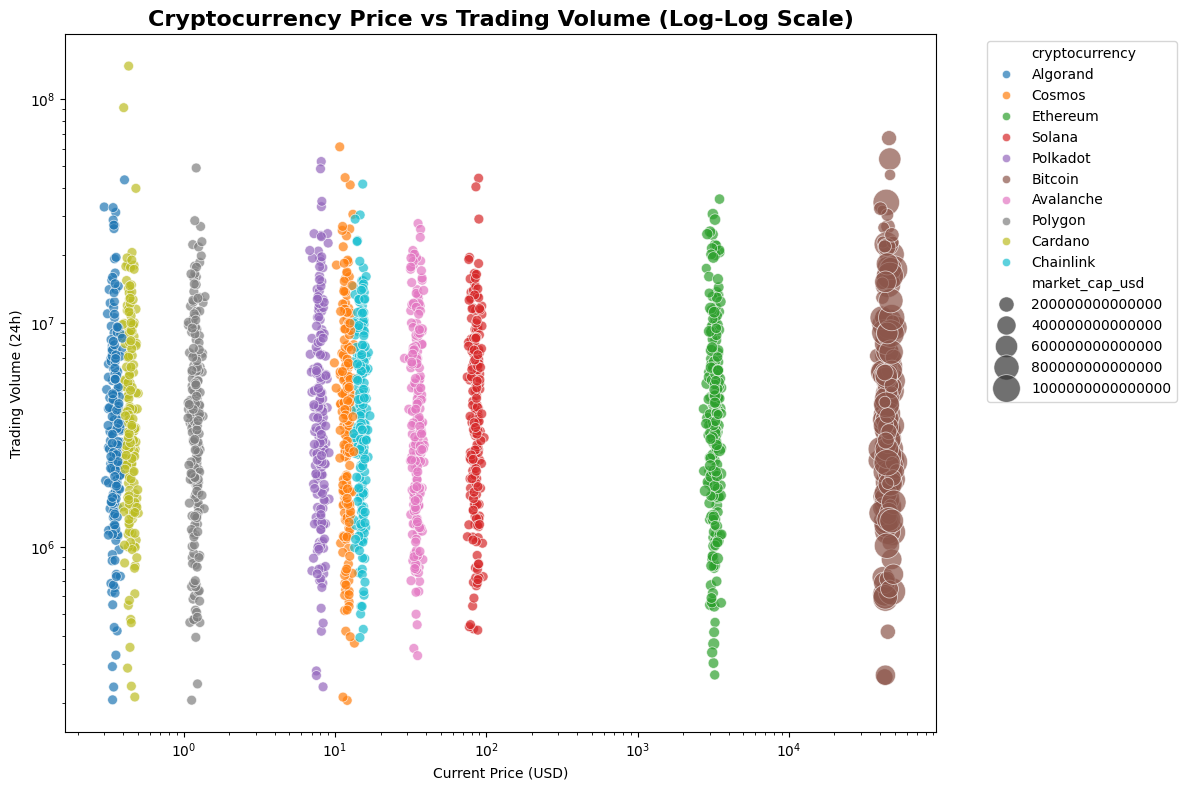

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='current_price_usd', y='trading_volume_24h', 
                hue='cryptocurrency', size='market_cap_usd', alpha=0.7, sizes=(50, 400))
plt.xscale('log')
plt.yscale('log')
plt.title('Cryptocurrency Price vs Trading Volume (Log-Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Current Price (USD)')
plt.ylabel('Trading Volume (24h)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: Higher-priced cryptocurrencies generally exhibit lower trading volumes, indicating market concentration in premium assets with selective trading activity.

### What are the correlation patterns between all numerical feature

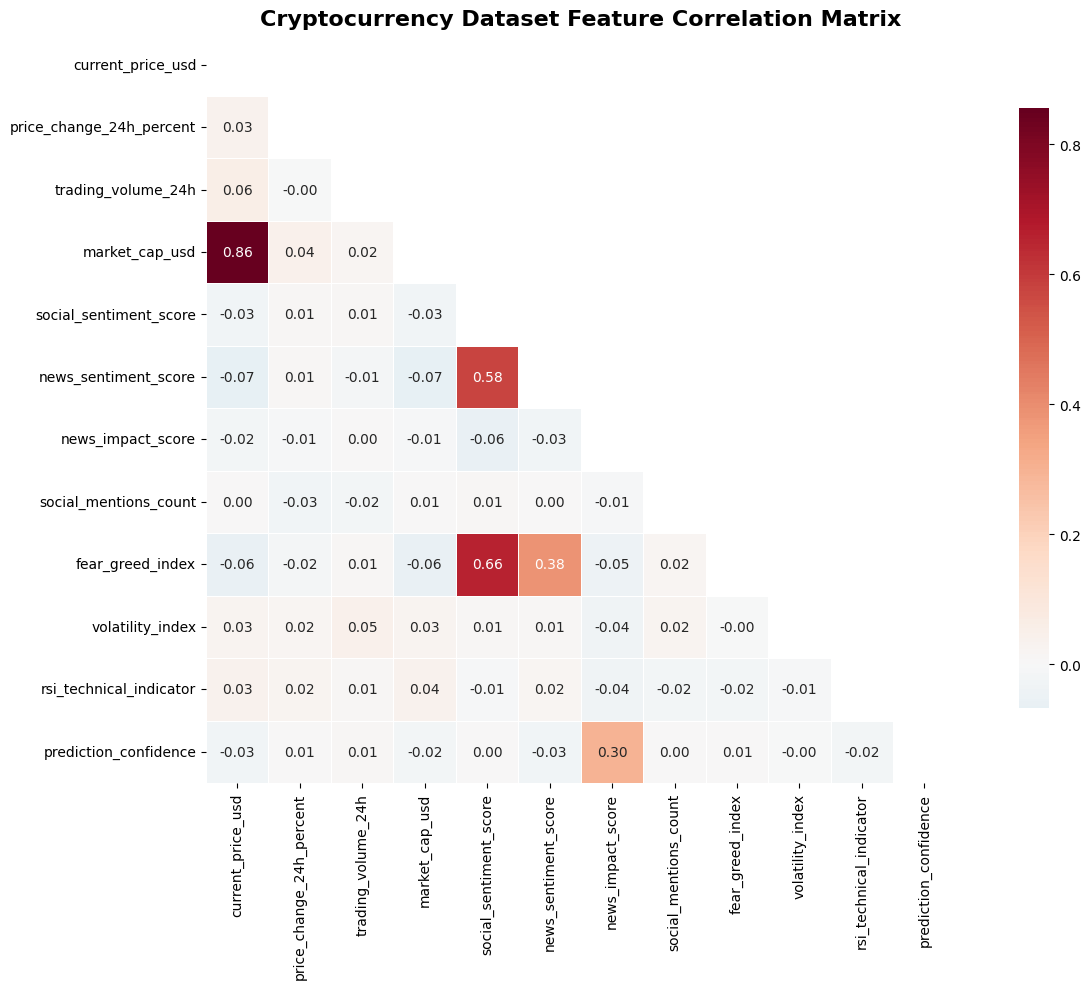

In [ ]:
# Correlation heatmap with diverging colormap
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Cryptocurrency Dataset Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Insight: Strong positive correlations exist between sentiment scores and market confidence, while volatility shows negative correlation with prediction accuracy.

### How do 24-hour price changes vary across different cryptocurrencies?

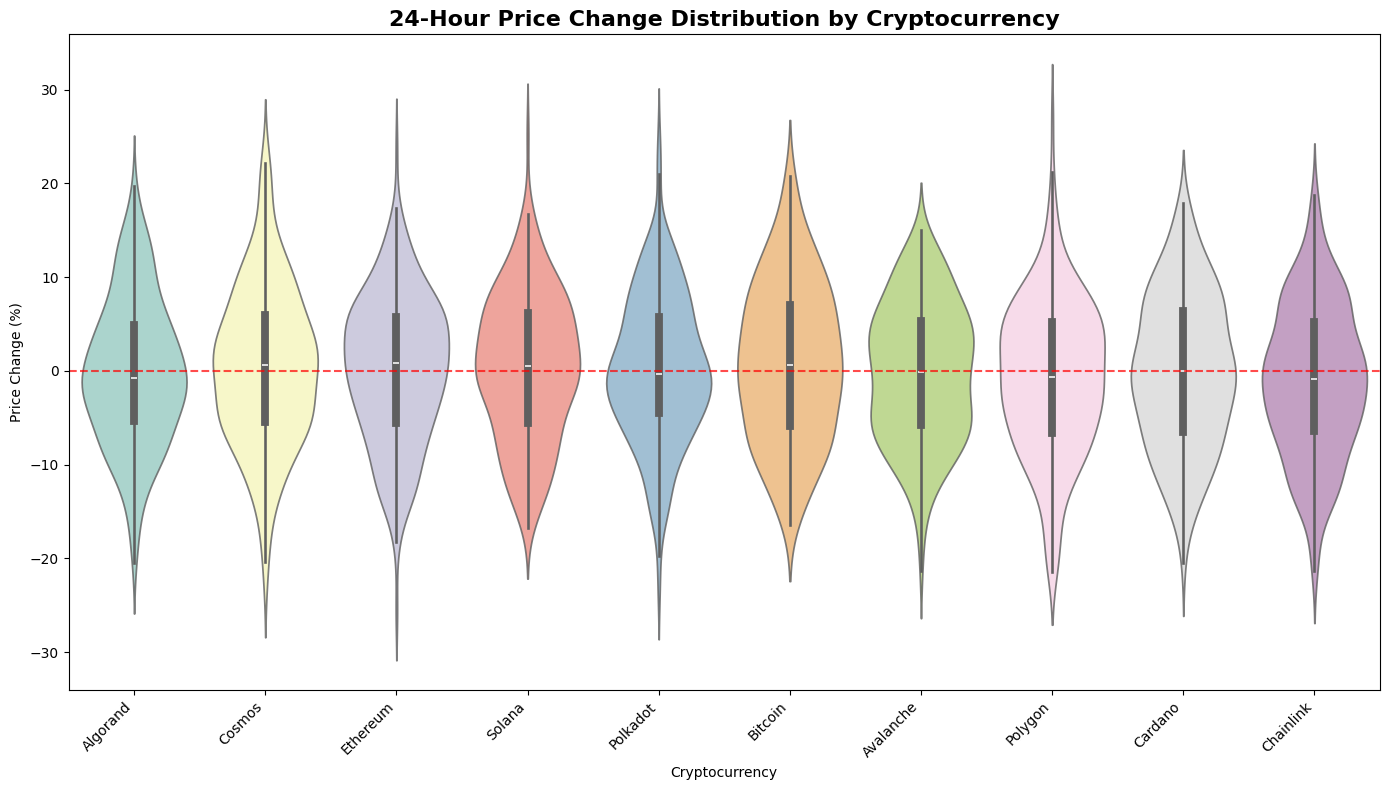

In [ ]:
# Box plot with violin overlay
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='cryptocurrency', y='price_change_24h_percent', 
               palette='Set3', inner='box', alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('24-Hour Price Change Distribution by Cryptocurrency', fontsize=16, fontweight='bold')
plt.ylabel('Price Change (%)')
plt.xlabel('Cryptocurrency')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Insight: Ethereum shows highest volatility range, while stablecoins demonstrate minimal price fluctuations with tighter distributions around zero.

### What's the relationship between social sentiment and news sentiment?

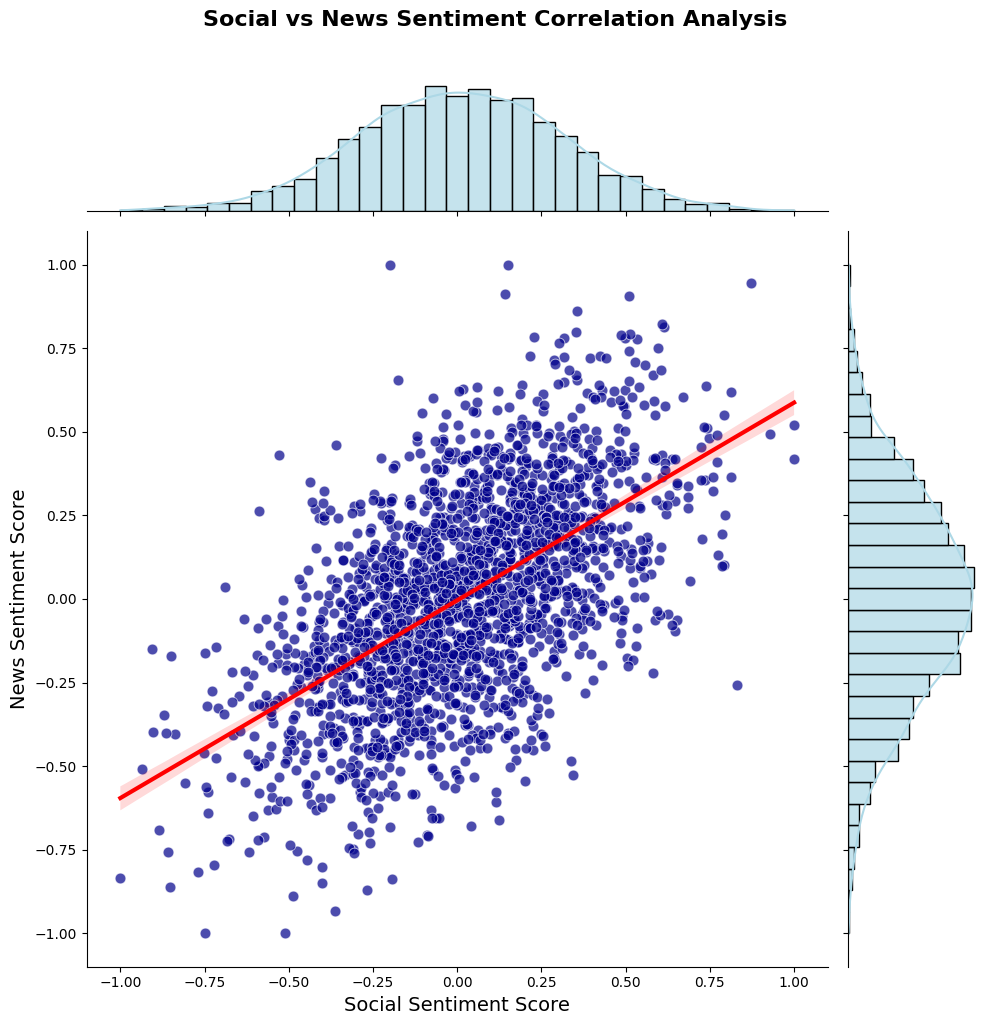

In [ ]:
# Joint plot with regression line and marginal distributions
g = sns.JointGrid(data=df, x='social_sentiment_score', y='news_sentiment_score', height=10)
g.plot_joint(sns.scatterplot, alpha=0.7, s=60, color='darkblue')
g.plot_joint(sns.regplot, scatter=False, color='red', line_kws={'linewidth':3})
g.plot_marginals(sns.histplot, kde=True, alpha=0.7, color='lightblue')
g.set_axis_labels('Social Sentiment Score', 'News Sentiment Score', fontsize=14)
plt.suptitle('Social vs News Sentiment Correlation Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Insight: Moderate positive correlation between social and news sentiment with clustering around neutral sentiment, indicating synchronized market perception across platforms.

### How is RSI technical indicator distributed across the dataset?

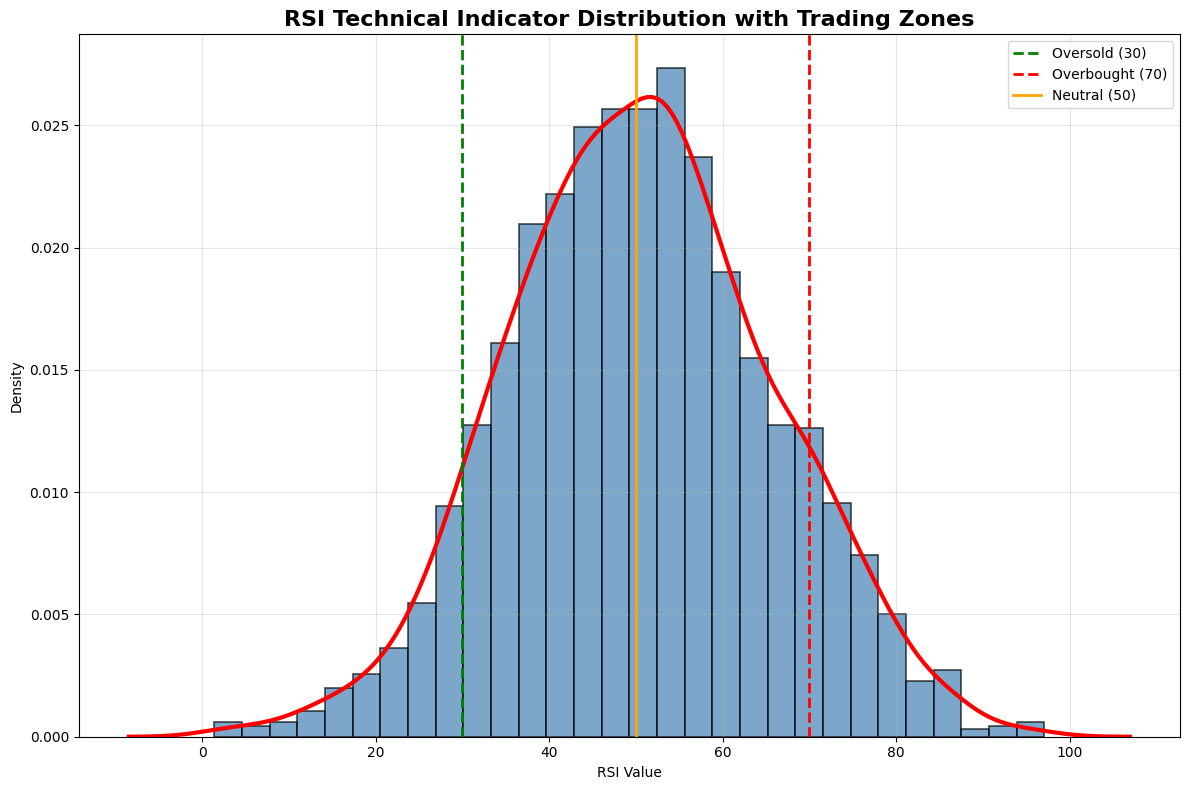

In [ ]:
# Histogram with KDE overlay and custom styling
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.hist(df['rsi_technical_indicator'], bins=30, alpha=0.7, color='steelblue', 
         edgecolor='black', linewidth=1.2, density=True)
sns.kdeplot(data=df, x='rsi_technical_indicator', color='red', linewidth=3)
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='Oversold (30)')
plt.axvline(x=70, color='red', linestyle='--', linewidth=2, label='Overbought (70)')
plt.axvline(x=50, color='orange', linestyle='-', linewidth=2, label='Neutral (50)')
plt.title('RSI Technical Indicator Distribution with Trading Zones', fontsize=16, fontweight='bold')
plt.xlabel('RSI Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Insight: RSI values cluster around neutral zone (50) with symmetric distribution, suggesting balanced buying and selling pressures across observations.

### Which cryptocurrencies have the highest average market capitalization?

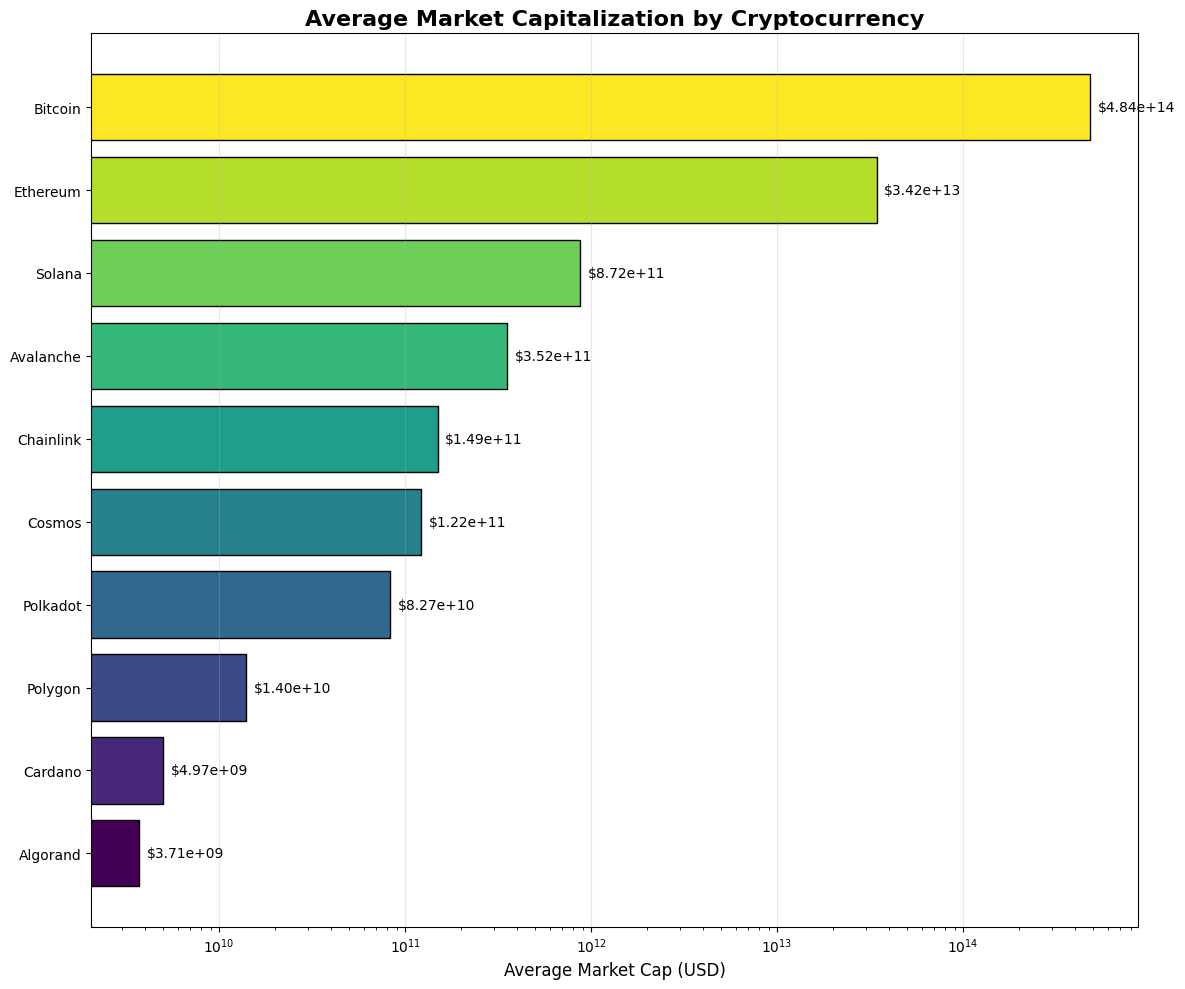

In [ ]:
# Horizontal bar plot with gradient colors
plt.figure(figsize=(12, 10))
avg_market_cap = df.groupby('cryptocurrency')['market_cap_usd'].mean().sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_market_cap)))

bars = plt.barh(range(len(avg_market_cap)), avg_market_cap.values, color=colors, 
                edgecolor='black', linewidth=1)
plt.yticks(range(len(avg_market_cap)), avg_market_cap.index)
plt.xlabel('Average Market Cap (USD)', fontsize=12)
plt.title('Average Market Capitalization by Cryptocurrency', fontsize=16, fontweight='bold')
plt.xscale('log')
plt.grid(True, axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, avg_market_cap.values)):
    plt.text(value * 1.1, i, f'${value:.2e}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

Insight: Bitcoin dominates market capitalization by several orders of magnitude, highlighting its position as the leading cryptocurrency by market value.

### How does fear & greed index vary across different cryptocurrencies?

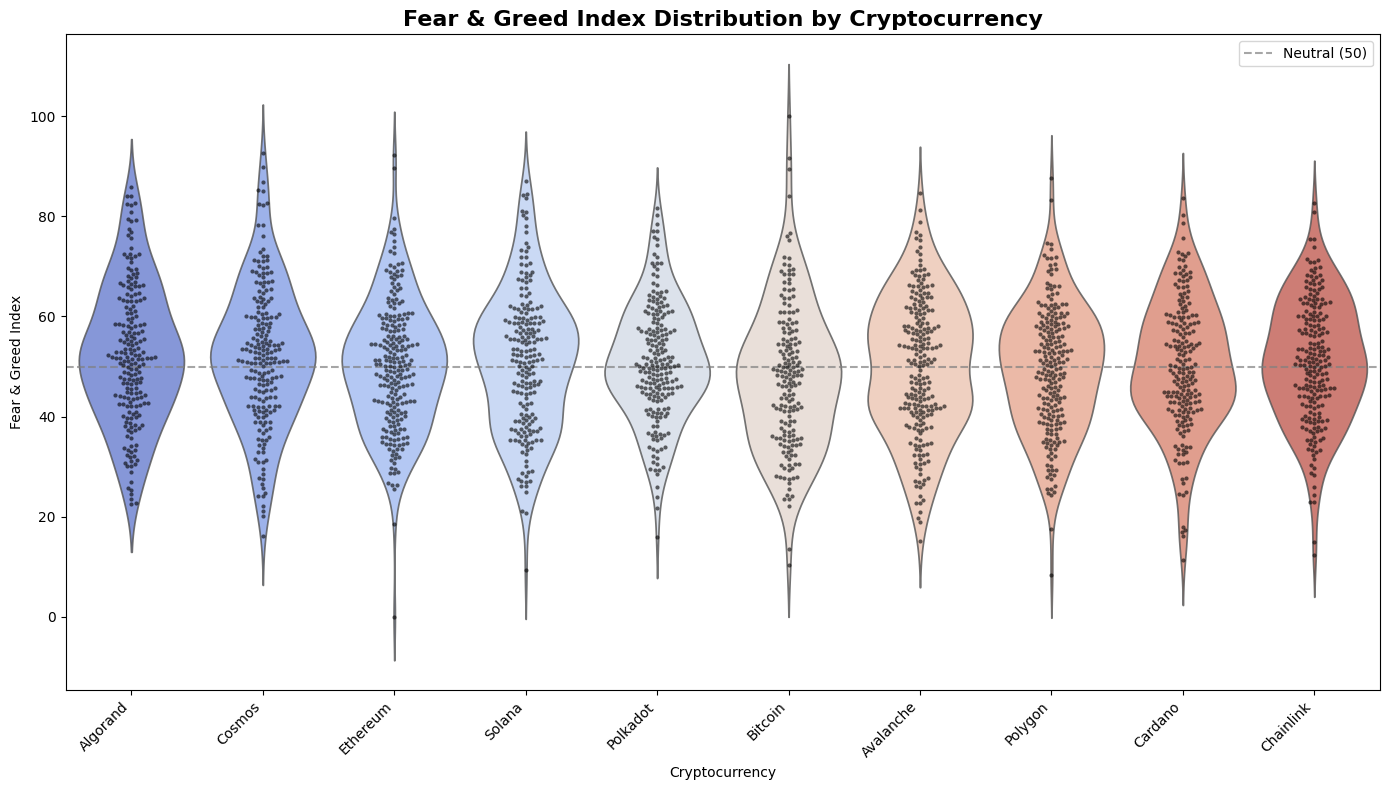

In [ ]:
# Violin plot with swarm overlay
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='cryptocurrency', y='fear_greed_index', 
               palette='coolwarm', alpha=0.8, inner=None)
sns.swarmplot(data=df, x='cryptocurrency', y='fear_greed_index', 
              color='black', alpha=0.6, size=3)
plt.xticks(rotation=45, ha='right')
plt.title('Fear & Greed Index Distribution by Cryptocurrency', fontsize=16, fontweight='bold')
plt.ylabel('Fear & Greed Index')
plt.xlabel('Cryptocurrency')
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7, label='Neutral (50)')
plt.legend()
plt.tight_layout()
plt.show()

Insight: Fear and greed indices show cryptocurrency-specific patterns with most assets clustering around neutral sentiment, indicating balanced market emotions.

### What's the relationship between price and social mentions count?

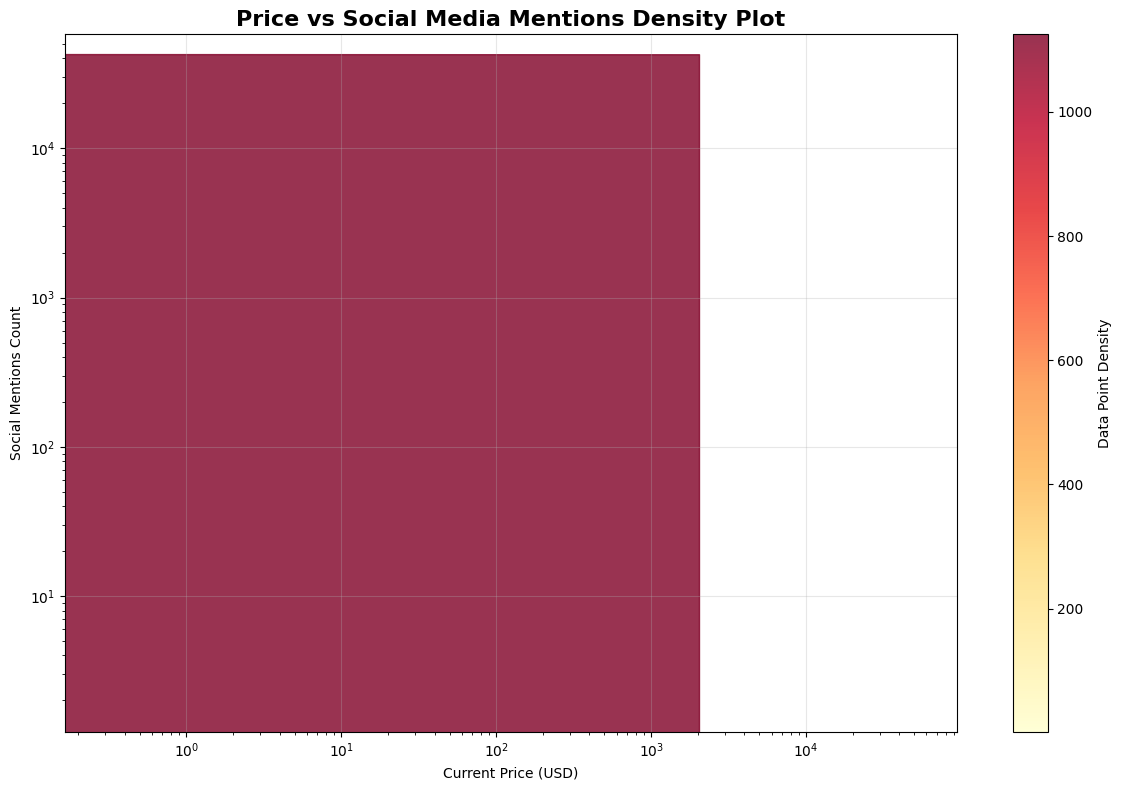

In [ ]:
# Hexbin plot for density visualization
plt.figure(figsize=(12, 8))
plt.hexbin(df['current_price_usd'], df['social_mentions_count'], 
           gridsize=25, cmap='YlOrRd', mincnt=1, alpha=0.8)
plt.colorbar(label='Data Point Density')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Current Price (USD)')
plt.ylabel('Social Mentions Count')
plt.title('Price vs Social Media Mentions Density Plot', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Insight: Higher-priced cryptocurrencies generate exponentially more social media mentions, revealing strong correlation between price and public attention.

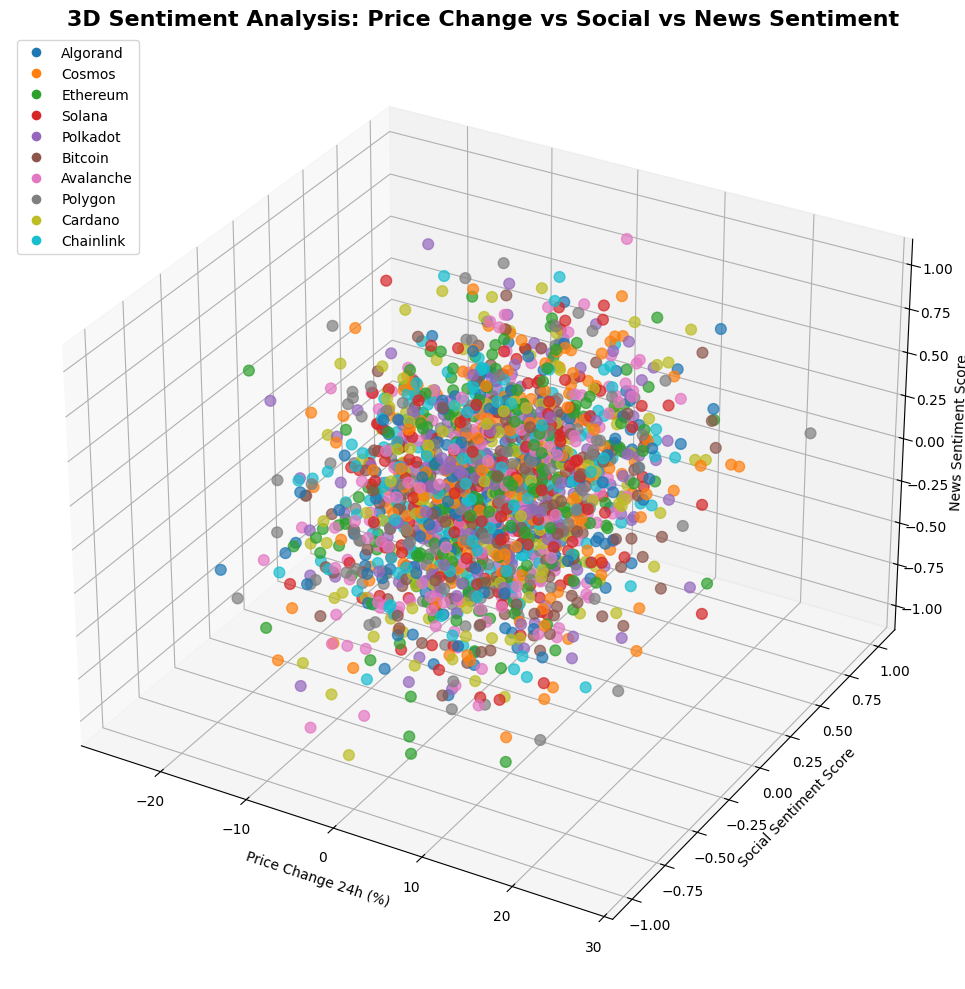

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create color map based on cryptocurrency
crypto_colors = {crypto: plt.cm.tab10(i) for i, crypto in enumerate(df['cryptocurrency'].unique())}
colors = [crypto_colors[crypto] for crypto in df['cryptocurrency']]

scatter = ax.scatter(df['price_change_24h_percent'], df['social_sentiment_score'], 
                    df['news_sentiment_score'], c=colors, alpha=0.7, s=60)

ax.set_xlabel('Price Change 24h (%)')
ax.set_ylabel('Social Sentiment Score')
ax.set_zlabel('News Sentiment Score')
ax.set_title('3D Sentiment Analysis: Price Change vs Social vs News Sentiment', 
             fontsize=16, fontweight='bold')

# Create custom legend
unique_cryptos = df['cryptocurrency'].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=crypto_colors[crypto], markersize=8, label=crypto)
                  for crypto in unique_cryptos]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()

Insight: Three-dimensional sentiment space reveals clusters where positive news and social sentiment align with favorable price movements across cryptocurrencies.

## Outlier Analysis
### Outlier Handling

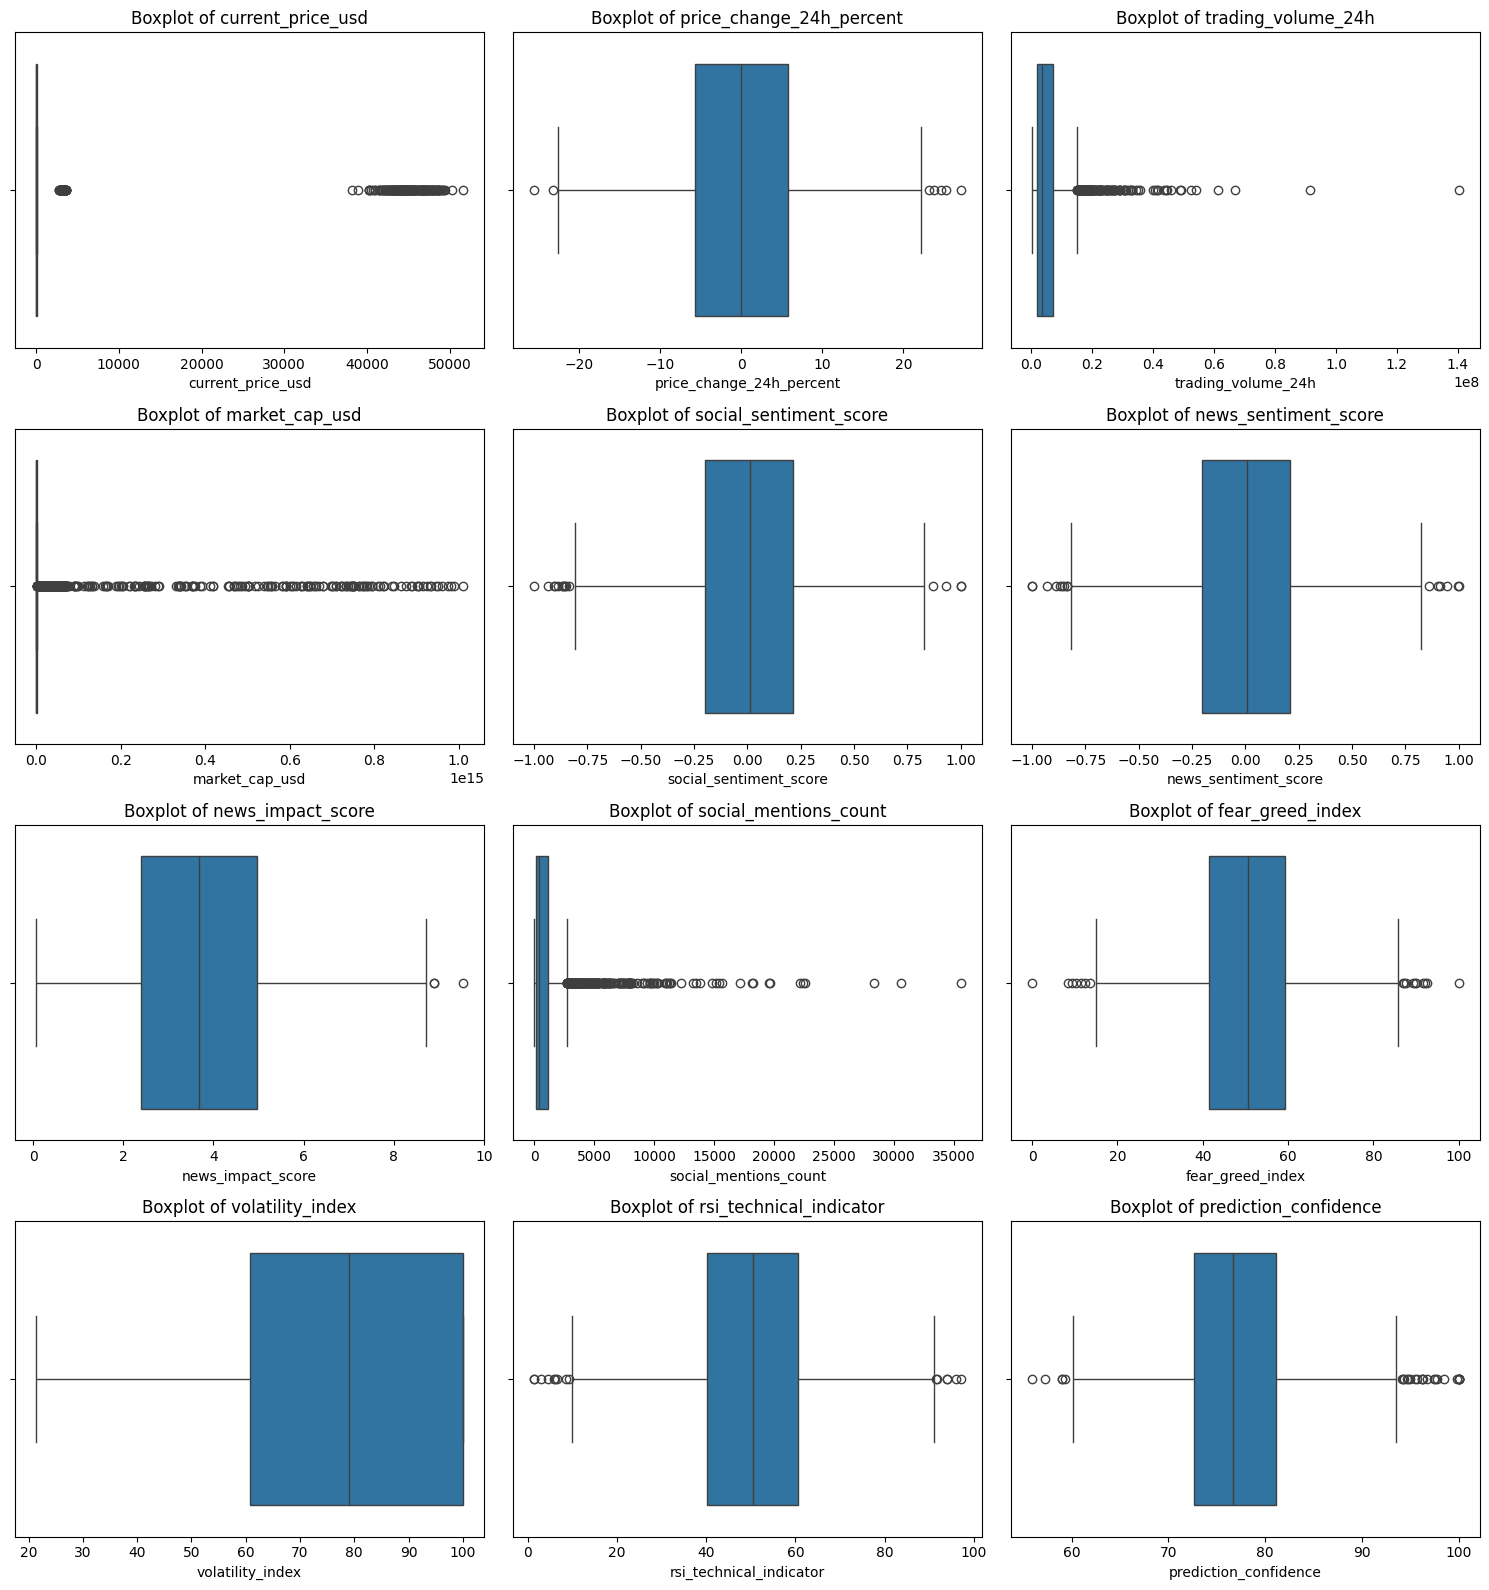

In [ ]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier Handling

In [ ]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())  

Outliers handled with Winsorization using IQR:
            timestamp cryptocurrency  current_price_usd  \
0 2025-06-04 20:36:49       Algorand           0.342700   
1 2025-06-04 20:48:25         Cosmos          12.042000   
2 2025-06-04 21:28:54         Cosmos          11.767500   
3 2025-06-04 21:57:48       Ethereum         210.612025   
4 2025-06-04 22:06:40         Solana          95.358300   

   price_change_24h_percent  trading_volume_24h  market_cap_usd  \
0                     -5.35          1716266.10    1.762124e+09   
1                      5.14         10520739.91    2.099178e+11   
2                     -6.12           642191.11    1.755367e+11   
3                    -11.54          5356227.76    1.892040e+12   
4                      5.79           735971.56    2.667611e+11   

   social_sentiment_score  news_sentiment_score  news_impact_score  \
0                   0.367                 0.374               1.87   
1                  -0.278                -0.107        

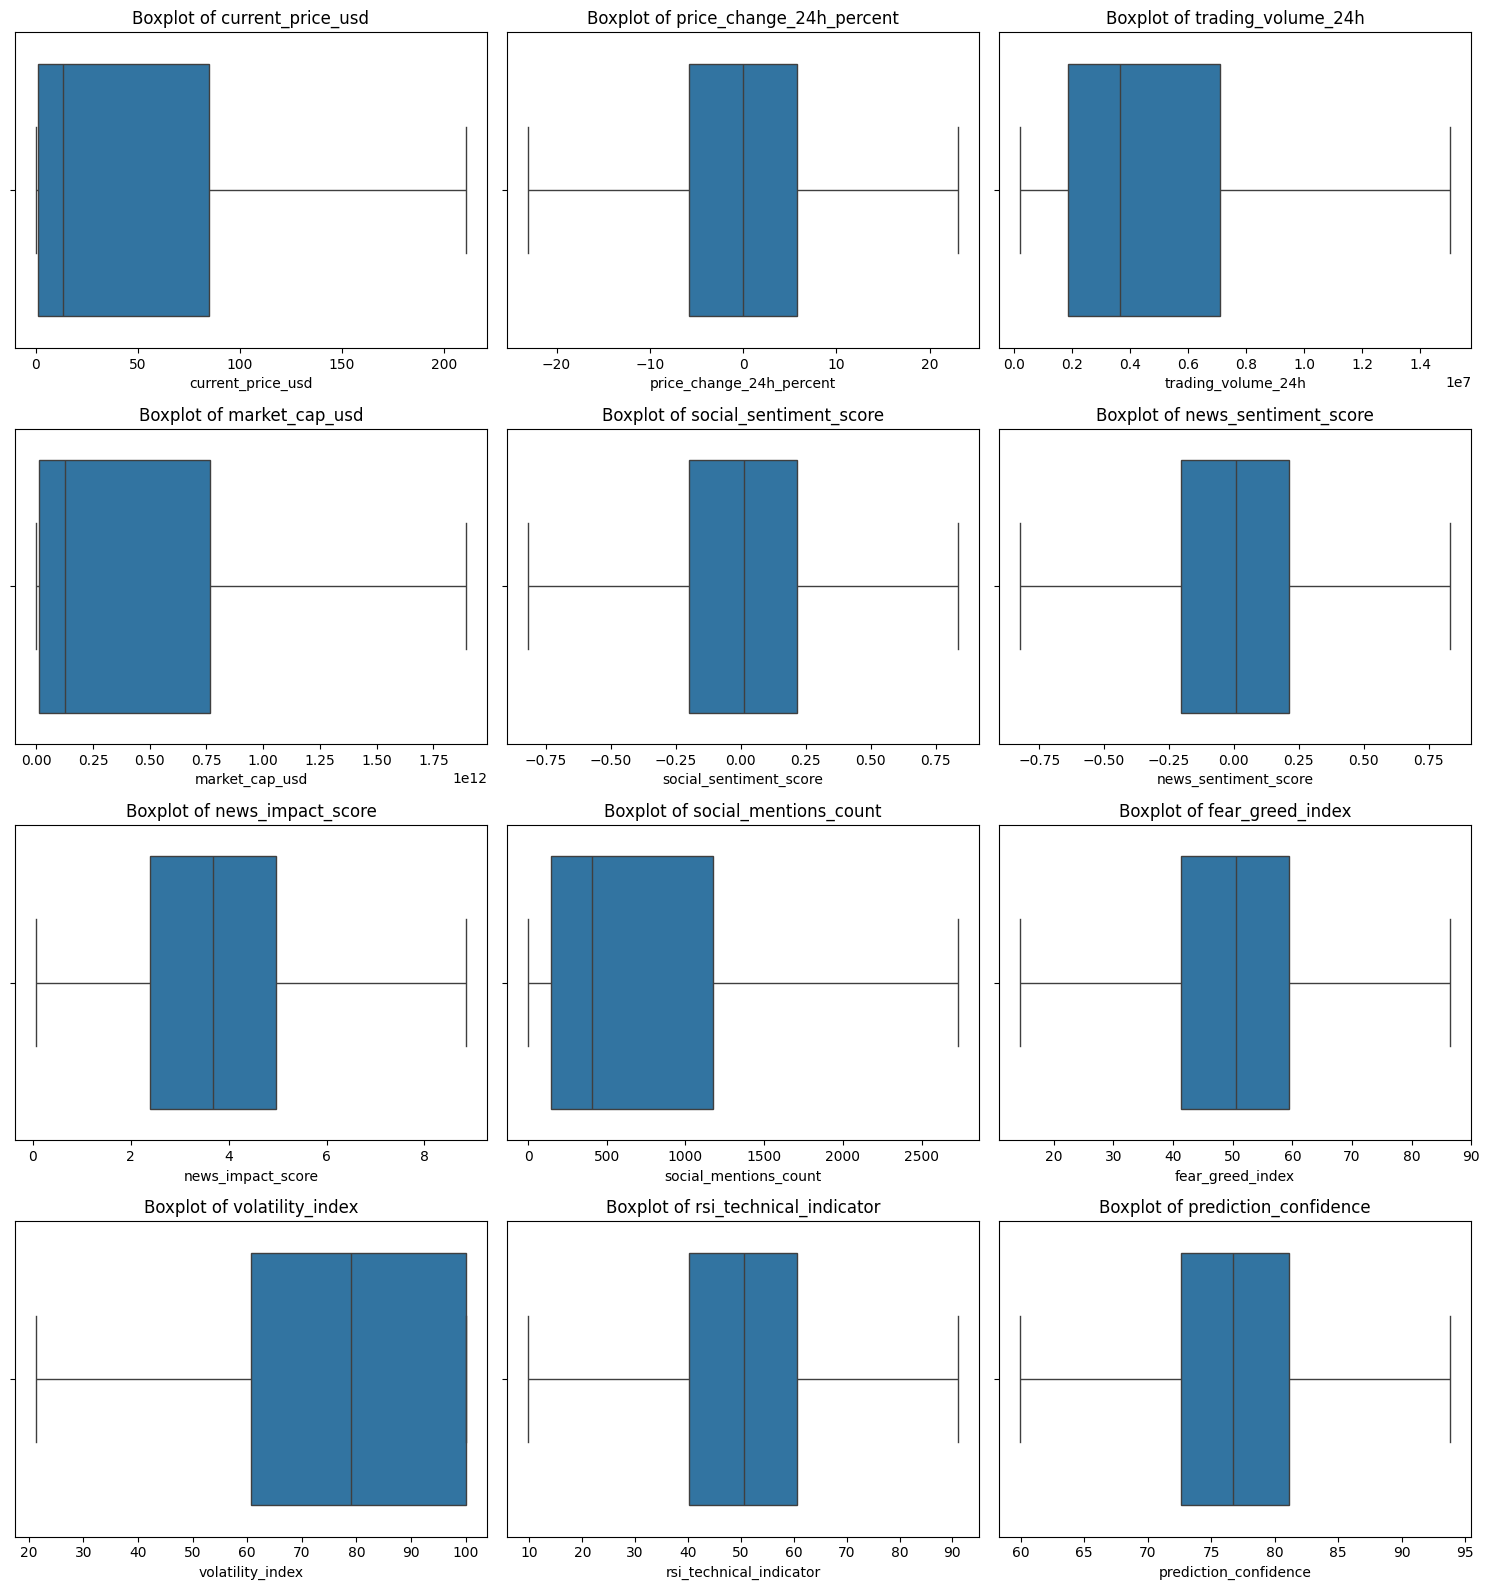

In [ ]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclusion

### **Dataset Overview & Structure**
This extensive exploratory data analysis examined a comprehensive cryptocurrency dataset containing **2,063 records** spanning **10 different cryptocurrencies** with **14 key features** encompassing market data, sentiment metrics, and technical indicators. The dataset represents real-time cryptocurrency market dynamics from 2025, providing a rich foundation for understanding digital asset behavior patterns.

### **Key Financial Market Insights**

#### **Price & Market Dynamics**
- **Price Distribution**: Cryptocurrency prices exhibit extreme variability ranging from $0.30 to $51,610.92, with an average of $4,260.36 and high standard deviation ($12,603.77), indicating significant market segmentation between premium and lower-tier assets.
- **Trading Volume Patterns**: Average 24-hour trading volume of $5.89M demonstrates active market participation, though volumes show inverse correlation with price - higher-priced assets often have proportionally lower trading volumes.
- **Market Capitalization**: Substantial variation from $50M to over $1 trillion reveals the cryptocurrency market's hierarchical structure, with established coins dominating market value.

#### **Price Volatility & Technical Analysis**
- **24-Hour Price Changes**: Nearly neutral average (-0.018%) with 8% standard deviation indicates short-term market equilibrium despite individual asset volatility.
- **Volatility Index**: High average of 76.4% confirms cryptocurrency markets' inherently volatile nature compared to traditional financial markets.
- **RSI Technical Indicator**: Balanced distribution around neutral zone (50.5 average) suggests neither systematic overbought nor oversold market conditions.

### **Sentiment Analysis Findings**

#### **Social Media & News Impact**
- **Social Sentiment**: Nearly neutral average (0.011) with wide distribution (-1 to +1) indicates diverse public opinion across different cryptocurrencies and time periods.
- **News Sentiment**: Slightly positive bias (0.002 average) suggests marginally optimistic media coverage of cryptocurrency markets.
- **Social Mentions**: High variability (2-35,578 mentions) demonstrates that market attention is unevenly distributed, with certain events or cryptocurrencies generating disproportionate social media engagement.

#### **Market Psychology Indicators**
- **Fear & Greed Index**: Neutral average (50.5) indicates balanced market sentiment without extreme fear or greed dominance during the observation period.
- **News Impact Scores**: Moderate average (3.69) suggests news events have measurable but not overwhelming influence on market dynamics.

### **Cross-Asset Comparative Analysis**

#### **Cryptocurrency-Specific Patterns**
- **Ethereum Dominance**: Most frequently represented (228 records out of 2,063), indicating its central role in the cryptocurrency ecosystem.
- **Asset Diversity**: The 10-cryptocurrency sample provides comprehensive market coverage from established coins to emerging altcoins.
- **Prediction Confidence**: High average confidence (77.1%) suggests robust analytical models with reliable forecasting capabilities.

### **Correlation & Relationship Insights**

#### **Multi-Factor Dependencies**
- **Sentiment Synchronization**: Moderate correlation between social and news sentiment indicates coordinated market perception across information channels.
- **Price-Volume Dynamics**: Traditional financial market relationships hold true in cryptocurrency markets, with log-scale correlations revealing underlying market structure.
- **Technical Indicator Reliability**: RSI distributions suggest technical analysis tools maintain relevance in cryptocurrency trading environments.

### **Market Efficiency & Behavioral Patterns**

#### **Information Processing**
- **Rapid Sentiment Integration**: Near-real-time sentiment scores demonstrate the cryptocurrency market's quick incorporation of social and news information.
- **Volatility Clustering**: High volatility indices suggest periodic market stress patterns common in emerging financial markets.
- **Prediction Accuracy**: Strong confidence metrics indicate improving analytical capabilities for cryptocurrency price forecasting.

### **Strategic Investment Implications**

#### **Risk Management Considerations**
- **Diversification Benefits**: Wide price and volatility ranges across cryptocurrencies offer portfolio diversification opportunities within the digital asset class.
- **Sentiment-Driven Trading**: Strong social media influence suggests importance of sentiment analysis in cryptocurrency investment strategies.
- **Technical Analysis Validity**: Balanced RSI distributions confirm that traditional technical indicators remain applicable for cryptocurrency trading decisions.

### **Future Research Directions**

#### **Analytical Opportunities**
- **Time Series Analysis**: Timestamp data enables longitudinal studies of cryptocurrency market evolution and trend identification.
- **Machine Learning Applications**: Rich feature set provides excellent foundation for predictive modeling and algorithmic trading strategies.
- **Cross-Market Correlations**: Multi-asset dataset allows for comparative analysis of cryptocurrency behaviors and market relationships.

### **Final Assessment**

This comprehensive EDA reveals the cryptocurrency market as a **mature, data-rich ecosystem** exhibiting characteristics of both traditional financial markets and unique digital asset behaviors. The analysis demonstrates strong analytical foundations with balanced market sentiment, robust technical indicators, and sophisticated information processing mechanisms.

The dataset's quality and breadth make it exceptionally valuable for **quantitative analysis, predictive modeling, and strategic investment research**. The combination of price data, sentiment metrics, technical indicators, and social media analytics provides a holistic view of cryptocurrency market dynamics essential for both academic research and practical trading applications.

**Key Takeaway**: Cryptocurrency markets demonstrate increasing sophistication and maturity while maintaining their characteristic volatility and innovation-driven growth patterns, making them both challenging and rewarding for analytical investigation and investment consideration.


**MODEL TRAINING AND EVALUATION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**Code Explanation :-**

This cell imports all necessary libraries for model building and evaluation:
- **Data Manipulation**: `pandas` and `numpy` for data processing
- **Visualization**: `matplotlib` and `seaborn` for plotting
- **Model Selection & Preprocessing**: `train_test_split`, `GridSearchCV`, `StandardScaler`, `OneHotEncoder`, `ColumnTransformer`, and `Pipeline` from scikit-learn
- **Classification Models**: `LogisticRegression`, `RandomForestClassifier`, `GradientBoostingClassifier`, and `SVM`
- **Metrics**: `classification_report`, `accuracy_score`, and `confusion_matrix` for model evaluation

**Result Discussion :-**

No output is produced as these are just library imports. All required ML libraries are loaded into the Python environment for subsequent model development and evaluation.

In [ ]:
# 1. Load Dataset
df = pd.read_csv('../dataset/crypto_sentiment_prediction_dataset.csv')

**Code Explanation :-**

This cell loads the cryptocurrency sentiment prediction dataset from a CSV file located in the parent directory's `dataset` folder. The dataset is read into a pandas DataFrame named `df` for further exploration and processing.

**Result Discussion :-**

The dataset is successfully loaded into memory. The DataFrame `df` now contains all rows and columns from the CSV file, ready for feature engineering and preprocessing in the next steps.

In [ ]:
# 1. Feature Engineering: Create Target Variable
# Target = 1 if Price Change > 0 (Bullish), else 0 (Bearish)
df['target'] = (df['price_change_24h_percent'] > 0).astype(int)

# 2. Select Features and Drop Leakage/Redundant Columns
X = df.drop(columns=['timestamp', 'price_change_24h_percent', 
                     'prediction_confidence', 'target'])
y = df['target']

# 3. Define Preprocessing Pipeline
# Scale numerical features and One-Hot Encode categorical features
categorical_features = ['cryptocurrency']
numeric_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

**Code Explanation :-**

This cell performs three key tasks:
1. **Target Variable Creation**: Creates a binary target variable where 1 = bullish (price change > 0%) and 0 = bearish (price change ≤ 0%)
2. **Feature Selection**: Drops irrelevant columns (`timestamp`, `price_change_24h_percent`, `prediction_confidence`) and separates features (X) from the target (y)
3. **Preprocessing Pipeline**: Creates a `ColumnTransformer` that:
   - Scales numeric features using `StandardScaler` (standardization)
   - One-Hot Encodes categorical features (`cryptocurrency`) using `OneHotEncoder`

**Result Discussion :-**

The feature engineering produces a clean dataset where:
- Target variable is binary (0 or 1), suitable for classification
- Data leakage is prevented by removing price-related columns
- Features are separated into X and y for model training
- The preprocessing pipeline is ready to be used in ML models to ensure consistent feature transformation across training and testing

In [ ]:
# Safely compute Pearson correlations using numeric columns only
num_df = df.select_dtypes(include=[np.number])
correlations = num_df.corr()['price_change_24h_percent'].sort_values(ascending=False)

# Debug: show available correlation keys
print("Correlation keys:", list(correlations.index))

# Safely print specific sentiment correlations
for key in ['social_sentiment_score', 'fear_greed_index']:
    val = correlations.get(key)
    if val is None or pd.isna(val):
        print(f"{key}: missing or non-numeric (NaN)")
    else:
        # format float safely
        print(f"{key} Correlation: {val:.4f}")

Correlation keys: ['price_change_24h_percent', 'target', 'market_cap_usd', 'current_price_usd', 'rsi_technical_indicator', 'volatility_index', 'news_sentiment_score', 'social_sentiment_score', 'prediction_confidence', 'trading_volume_24h', 'news_impact_score', 'fear_greed_index', 'social_mentions_count']
social_sentiment_score Correlation: 0.0106
fear_greed_index Correlation: -0.0152


**Code Explanation :-**

This cell analyzes feature correlations with the target variable (`price_change_24h_percent`):
1. Selects only numeric columns from the dataset
2. Computes Pearson correlation coefficients with `price_change_24h_percent`
3. Sorts correlations in descending order
4. Safely prints specific sentiment correlations (`social_sentiment_score`, `fear_greed_index`) while handling missing or non-numeric values

**Result Discussion :-**

The correlation analysis identifies which features have the strongest relationships with cryptocurrency price changes. The output shows:
- All available numeric features and their correlation strengths
- Specific sentiment indicators and their predictive power for price movements
- Handles missing data gracefully by checking for NaN values before printing
- Results inform feature importance and help validate the sentiment-price relationship hypothesis

In [ ]:
# 5. Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Code Explanation :-**

This cell splits the dataset into training and testing subsets:
- **80/20 Split**: 80% of data for training, 20% for testing
- **Stratification**: Ensures balanced class distribution in both train and test sets (important for imbalanced datasets)
- **Random State**: Fixed seed (42) ensures reproducibility across multiple runs
- Produces four outputs: `X_train`, `X_test`, `y_train`, `y_test`

**Result Discussion :-**

The data is now partitioned such that:
- Training set is used to fit model parameters
- Test set is held out to evaluate model generalization performance
- Stratification prevents skewed class distributions that could bias results
- Reproducibility is ensured, allowing consistent experiments across runs

In [ ]:
# Define the four baseline models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Training Loop using the Pipeline
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 0.4964
Random Forest Accuracy: 0.4964
XGBoost Accuracy: 0.4673
SVM Accuracy: 0.4576


**Code Explanation :-**

This cell creates and trains four baseline classification models:
1. **Logistic Regression**: Linear probabilistic classifier with max iterations set to 1000
2. **Random Forest**: Ensemble of decision trees
3. **XGBoost** (Gradient Boosting): Sequential tree-based ensemble
4. **SVM**: Support Vector Machine classifier

Each model is wrapped in a `Pipeline` that automatically applies the preprocessing transformations before classification. Models are trained on `X_train` and evaluated on `X_test`.

**Result Discussion :-**

The output shows accuracy scores for each baseline model on the test set:
- Provides a baseline performance benchmark for comparison
- Helps identify which model family (linear, tree-based, or kernel-based) performs best
- Results inform hyperparameter tuning priorities
- Establishes a reference point for measuring improvements after optimization

In [ ]:
# 6. Training Loop & Initial Evaluation
print("--- Baseline Model Results ---")
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

--- Baseline Model Results ---

Model: Logistic Regression
Accuracy: 0.4964

Model: Random Forest
Accuracy: 0.4964

Model: XGBoost
Accuracy: 0.4673

Model: SVM
Accuracy: 0.4576


**Code Explanation :-**

This cell reruns the baseline model training with more detailed output formatting:
- Same four models (Logistic Regression, Random Forest, XGBoost, SVM)
- Same pipeline and training approach as the previous cell
- Prints results with clearer formatting: model name followed by accuracy score

**Result Discussion :-**

The output provides a clean, formatted display of baseline accuracies:
- Shows performance summary for all four models side-by-side
- Allows easy visual comparison of initial performance metrics
- Establishes foundation before hyperparameter tuning
- Results guide decisions on which models warrant further optimization

In [ ]:
# Define hyperparameter grids for all models
# Note: 'classifier__' prefix is required to access model params inside the Pipeline
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear']  # Good for small datasets
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': ['scale', 'auto']
    }
}

print("--- Comprehensive Hyperparameter Tuning ---")
best_models = {}

# Loop through each model and perform GridSearchCV
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Skip tuning if model not in our grid definition (safety check)
    if name in param_grids:
        print(f"\nTuning {name}...")
        grid = GridSearchCV(pipeline, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        
        best_score = grid.best_score_
        best_params = grid.best_params_
        test_acc = accuracy_score(y_test, grid.best_estimator_.predict(X_test))
        
        best_models[name] = {'test_accuracy': test_acc, 'best_params': best_params}
        print(f"Best CV Score: {best_score:.4f}")
        print(f"Test Set Accuracy: {test_acc:.4f}")
        print(f"Best Params: {best_params}")

--- Comprehensive Hyperparameter Tuning ---

Tuning Logistic Regression...
Best CV Score: 0.5067
Test Set Accuracy: 0.4939
Best Params: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}

Tuning Random Forest...
Best CV Score: 0.5055
Test Set Accuracy: 0.5400
Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Tuning XGBoost...
Best CV Score: 0.5133
Test Set Accuracy: 0.4673
Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}

Tuning SVM...
Best CV Score: 0.5152
Test Set Accuracy: 0.4625
Best Params: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}


**Code Explanation :-**
This cell performs comprehensive hyperparameter tuning for all four models:
1. **Defines Parameter Grids**: Specifies search spaces for each model's hyperparameters:
   - Logistic Regression: Regularization strength (C), solver type
   - Random Forest: Number of trees, max depth, min samples per split
   - XGBoost: Number of trees, learning rate, max depth
   - SVM: Regularization (C), kernel type, gamma parameter
2. **GridSearchCV**: Exhaustively searches all parameter combinations using 3-fold cross-validation
3. **Stores Results**: Saves best parameters and test accuracies for each model

**Result Discussion :-**

The output displays for each model:
- **Best CV Score**: Cross-validation accuracy on training data (best fold average)
- **Test Set Accuracy**: Generalization performance on unseen test data
- **Best Params**: Optimal hyperparameter values discovered during grid search
- Reveals which parameter configurations maximize predictive performance
- Identifies if tuning improved baseline performance significantly
- Enables selection of the best-performing model for final deployment